<center><h1> Pedestrian Recognition System </h1></center>

---



## Downloading the Dataset

In [8]:
# Download the Daimler Pedestrian Classification Benchmark dataset
!wget -p dataset/  http://www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz

--2024-12-15 22:34:36--  http://dataset/
Resolving dataset (dataset)... failed: Name or service not known.
wget: unable to resolve host address ‘dataset’
--2024-12-15 22:34:37--  http://www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz
Resolving www.lookingatpeople.com (www.lookingatpeople.com)... 92.205.55.171, 2a00:1169:103:3340::
Connecting to www.lookingatpeople.com (www.lookingatpeople.com)|92.205.55.171|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30640226 (29M) [application/x-gzip]
Saving to: ‘www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz’

www.lookingatpeople 100%[===================>]  29.22M  8.90MB/s    in 3.3s    

2024-12-15 22:34:40 (8.90 MB/s) - ‘www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz’ saved [30640226/30640226]

FINISHED --2024-12-15 22:34:40--
Total wall clock time: 4.1s
Downloaded: 1 files, 29M in 3.3s (8.90 MB/s)


## Extracting the Dataset

In [9]:
# After downloading the dataset, the next step is to extract the archive.
# This will give us the images of pedestrians and non-pedestrians stored in specific folders.

# Hide Output
%%capture output
# Extract the dataset into the working directory
!tar -xvf  /content/www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz

# Building the Pedestrian Recognition System
Once the dataset is prepared, we will now develop the pedestrian recognition system.
This includes:
1. Loading the pedestrian and non-pedestrian images from the dataset.
2. Extracting HOG features from these images.
3. Training a machine learning model (SVM) for classification.
4. Evaluating the model's performance.

## 1. Loading the pedestrian and non-pedestrian images from the dataset

In [10]:
import os
import cv2
import numpy as np

def load_images_and_labels(base_path):
    labels = []
    images = []
    folders = ['1', '2', '3', 'T1', 'T2']  # Folder names

    for folder in folders:
        ped_path = os.path.join(base_path, folder, 'ped_examples')
        non_ped_path = os.path.join(base_path, folder, 'non-ped_examples')

        # Load pedestrian images
        for filename in os.listdir(ped_path):
            if filename.endswith('.pgm'):
                img = cv2.imread(os.path.join(ped_path, filename), cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    images.append(img)
                    labels.append(1)  # 1 for pedestrian

        # Load non-pedestrian images
        for filename in os.listdir(non_ped_path):
            if filename.endswith('.pgm'):
                img = cv2.imread(os.path.join(non_ped_path, filename), cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    images.append(img)
                    labels.append(0)  # 0 for non-pedestrian

    return images, labels

# Base path where folders are located
base_path = '/content'

# Load images and labels
images, labels = load_images_and_labels(base_path)

## 2. Extracting HOG features from these images

In [11]:
from skimage.feature import hog

def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Extract HOG features
        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=True, block_norm='L2')
        hog_features.append(features)
    return hog_features

# Extract HOG features
features = extract_hog_features(images)

## 3. Training a machine learning model (SVM) for classification

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)

# Train an SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

## 4. Evaluating the model's performance

Accuracy: 80.86%


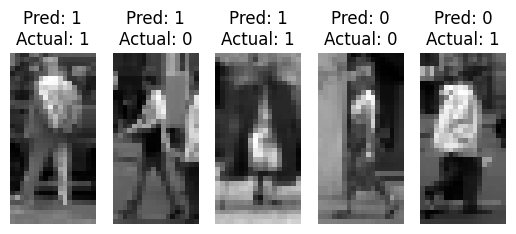

In [13]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display some predictions
for i, (image, prediction, actual) in enumerate(zip(images[:5], y_pred[:5], y_test[:5])):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Pred: {prediction}\nActual: {actual}')
    plt.axis('off')
plt.show()